In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator as IDG

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = IDG(rescale = 1./255,
                    shear_range=0.3,
                    zoom_range = 0.2,
                    horizontal_flip = True)

training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Smoking_DS/Training/",
                                                 target_size=(251,251),
                                                 batch_size=32,
                                                 class_mode="binary")

Found 716 images belonging to 2 classes.


In [ ]:
test_datagen = IDG(rescale = 1./255)

testing_set = test_datagen.flow_from_directory("/content/drive/MyDrive/Smoking_DS/Testing/",
                                               target_size = (251,251),
                                               batch_size = 32,
                                               class_mode = "binary")

Found 224 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 64,
                               kernel_size = 3,
                               activation = "relu",
                               input_shape=[251,251,3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                  strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 64,
                               kernel_size = 3,
                               activation = "relu"))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                  strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
cnn.compile(optimizer="Adam", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
model = cnn.fit(x = training_set, validation_data=testing_set, epochs = 20)

Epoch 1/20
23/23 [==============================] - 225s 10s/step - loss: 2.6843 - accuracy: 0.5391 - val_loss: 0.6820 - val_accuracy: 0.5000
Epoch 2/20
23/23 [==============================] - 96s 4s/step - loss: 0.6689 - accuracy: 0.5587 - val_loss: 0.6637 - val_accuracy: 0.5714
Epoch 3/20
23/23 [==============================] - 97s 4s/step - loss: 0.6282 - accuracy: 0.6466 - val_loss: 0.7163 - val_accuracy: 0.5491
Epoch 4/20
23/23 [==============================] - 95s 4s/step - loss: 0.6093 - accuracy: 0.6816 - val_loss: 0.6143 - val_accuracy: 0.6562
Epoch 5/20
23/23 [==============================] - 94s 4s/step - loss: 0.5779 - accuracy: 0.6969 - val_loss: 0.5859 - val_accuracy: 0.6607
Epoch 6/20
23/23 [==============================] - 96s 4s/step - loss: 0.5480 - accuracy: 0.7263 - val_loss: 0.5773 - val_accuracy: 0.7232
Epoch 7/20
23/23 [==============================] - 93s 4s/step - loss: 0.5893 - accuracy: 0.7067 - val_loss: 0.6065 - val_accuracy: 0.6652
Epoch 8/20
23/23 [

In [ ]:
cnn.save("Smoking_CNN.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


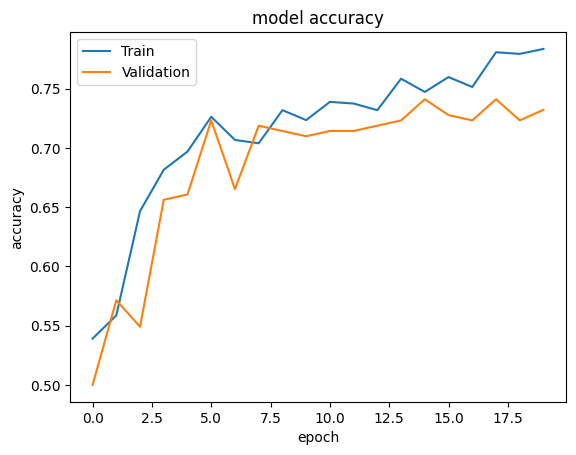

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()